 Parte 1: Cargar y mostrar el dataset



Esta parte te permite cargar el dataset desde Google Sheets y ver cómo está estructurado (columnas y primeras filas).


In [2]:
import pandas as pd

# ID del documento y nombre de la hoja
sheet_id = "1IxBprEMZzej4c6InHyIkBqVjbgE7WtMK6dAHZNa47n0"
sheet_name = "dataset_final2"

# Construir la URL CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Cargar dataset
df = pd.read_csv(url)

# Ver columnas y primeras filas
print("Columnas disponibles:")
print(df.columns.tolist())

df.head()


Columnas disponibles:
['_id', 'bus_id', 'timestamp', 'latitud', 'longitud', 'velocidad', 'direccion', 'estado_motor', 'nivel_combustible', 'temperatura_motor', 'alerta', 'padron', 'placa', 'combustible', 'marca', 'chip (GPS)', 'sede', 'estado_bus']


,_id,bus_id,timestamp,latitud,longitud,velocidad,direccion,estado_motor,nivel_combustible,temperatura_motor,alerta,padron,placa,combustible,marca,chip (GPS),sede,estado_bus
0,6833ec7481e5594647d5a0b9,15,2025-05-25 0:00:00,-12.048974,-77.045804,63.96,141,encendido,39,109,"{'tipo': 'zona_critica', 'resuelto': False}",114.0,G6H456,GNV,VW FPT PB,si,Huaycan,En ruta
1,6833ec7481e5594647d5a0ba,14,2025-05-25 0:00:10,-12.045146,-77.041687,24.68,323,apagado,33,95,"{'tipo': 'zona_critica', 'resuelto': False}",113.0,D4E771,GNV,VW FPT PB,si,Huaycan,En ruta
2,6833ec7481e5594647d5a0bb,16,2025-05-25 0:00:20,-12.048722,-77.046909,22.70,338,encendido,84,97,"{'tipo': 'zona_critica', 'resuelto': True}",115.0,J2K340,GNV,VW FPT PB,si,Huaycan,En ruta
3,6833ec7481e5594647d5a0bc,8,2025-05-25 0:00:30,-12.058106,-77.033253,93.66,10,encendido,23,97,"{'tipo': 'temperatura_alta', 'resuelto': True}",107.0,R8S215,GNV,GOLDEN DRAGON GNV ACCESO,si,Huaycan,En ruta
4,6833ec7481e5594647d5a0bd,38,2025-05-25 0:00:40,-12.055585,-77.044605,14.95,74,apagado,37,73,"{'tipo': 'temperatura_alta', 'resuelto': True}",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Parte 2: Ver resumen estadístico de los datos numéricos

Esto muestra estadísticas como media, desviación estándar, máximos y mínimos de columnas numéricas como velocidad, temperatura_motor, etc.

In [3]:
df.describe()


,bus_id,latitud,longitud,velocidad,direccion,nivel_combustible,temperatura_motor,padron
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1467.000000
mean,25.380500,-12.050002,-77.039930,59.922510,182.699000,49.669000,89.689000,117.739605
std,14.343835,0.005689,0.005806,34.552647,104.146578,28.960521,17.859192,10.451490
min,1.000000,-12.059986,-77.049995,0.050000,0.000000,0.000000,60.000000,100.000000
25%,13.000000,-12.054764,-77.045057,30.727500,94.000000,25.000000,74.000000,109.000000
50%,25.000000,-12.050042,-77.039841,59.940000,183.000000,49.000000,90.000000,118.000000
75%,37.000000,-12.045121,-77.034762,89.035000,274.000000,75.000000,105.000000,127.000000
max,50.000000,-12.040005,-77.030000,119.890000,359.000000,100.000000,120.000000,135.000000


 Parte 3: Ver cuántos registros hay por bus (top 10)

Muestra cuáles son los 10 buses con más registros en el dataset.

In [6]:
df['bus_id'].value_counts().head(10)

,count
bus_id,
8,53
27,49
42,49
34,49
46,48
29,48
13,47
16,47
25,46


Parte 4: Visualizar los 10 buses con más registros

Genera una gráfica de barras para visualizar los buses más frecuentes en el dataset.

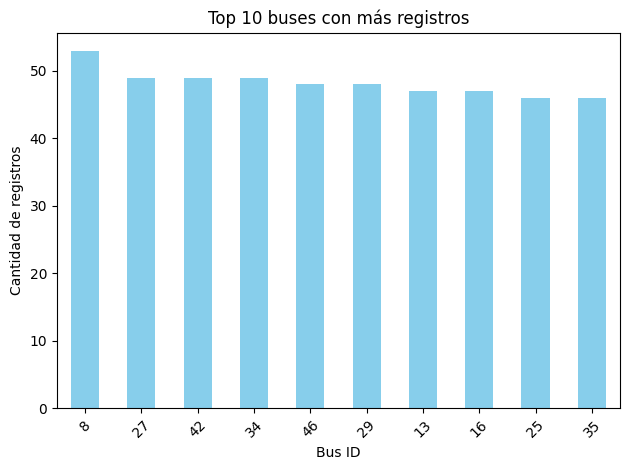

In [7]:
import matplotlib.pyplot as plt

df['bus_id'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 buses con más registros')
plt.xlabel('Bus ID')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Parte 5: Ver la cantidad de alertas registradas

Esto muestra cuántas veces aparece cada tipo de alerta en el dataset. Por ejemplo, si hay "Exceso de velocidad", "Motor apagado", etc.

In [8]:
df['alerta'].value_counts()


,count
alerta,
"{'tipo': 'temperatura_alta', 'resuelto': False}",355
"{'tipo': 'zona_critica', 'resuelto': True}",339
"{'tipo': 'velocidad_excesiva', 'resuelto': False}",335
"{'tipo': 'zona_critica', 'resuelto': False}",333
"{'tipo': 'temperatura_alta', 'resuelto': True}",330
"{'tipo': 'velocidad_excesiva', 'resuelto': True}",308


 Parte 6: Visualización de alertas más comunes

 Visualiza gráficamente los tipos de alertas que más se repiten.

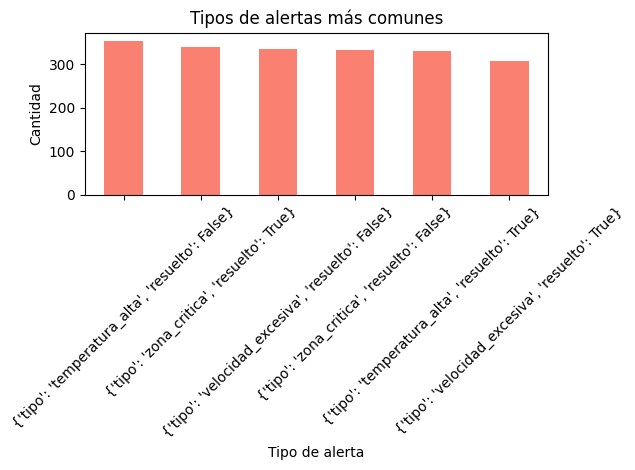

In [9]:
df['alerta'].value_counts().plot(kind='bar', color='salmon')
plt.title('Tipos de alertas más comunes')
plt.xlabel('Tipo de alerta')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Parte 7: Distribución de velocidad por bus (boxplot)

Este gráfico muestra la distribución de velocidades por cada bus (Top 5 más frecuentes), permitiendo identificar excesos o rangos típicos.

<ipython-input-10-bded3950066a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bus_id', y='velocidad', data=df_top_buses, palette="Blues")


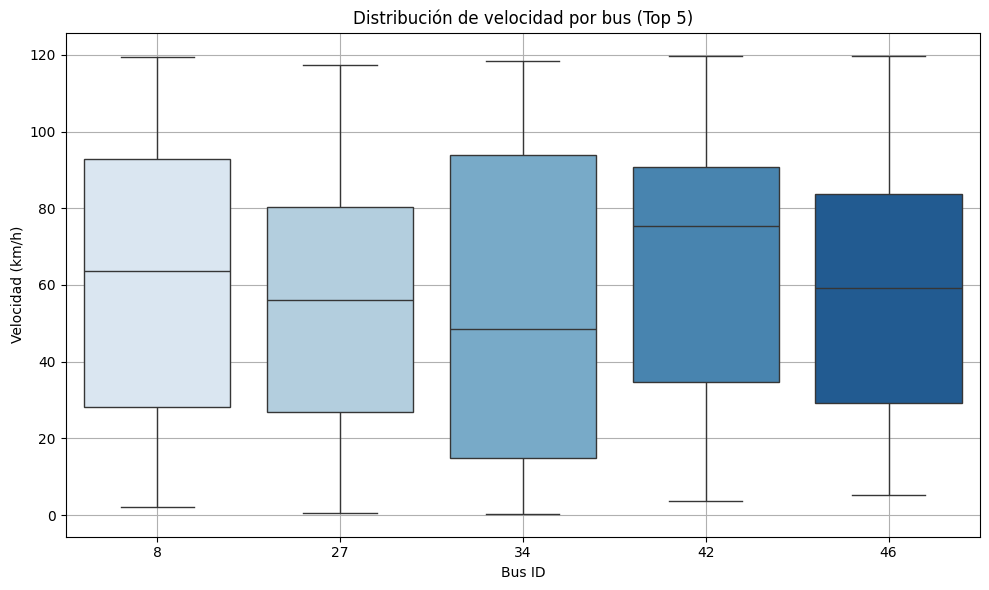

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo los buses más frecuentes para mejor visualización
top_buses = df['bus_id'].value_counts().head(5).index
df_top_buses = df[df['bus_id'].isin(top_buses)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='bus_id', y='velocidad', data=df_top_buses, palette="Blues")

plt.title("Distribución de velocidad por bus (Top 5)")
plt.xlabel("Bus ID")
plt.ylabel("Velocidad (km/h)")
plt.grid(True)
plt.tight_layout()
plt.show()
